Import statements

In [192]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [193]:
wineDf = pd.read_csv('WineQT.csv')

In [194]:
wineDf.shape

(1143, 13)

In [195]:
wineDf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [196]:
wineDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


The above informations hints at all the values of the dataset being numerical. To check the uniqueness of each column we run the following

In [197]:
wineDf.nunique().sort_values(ascending=True)

quality                    6
free sulfur dioxide       53
alcohol                   61
citric acid               77
residual sugar            80
pH                        87
sulphates                 89
fixed acidity             91
chlorides                131
volatile acidity         135
total sulfur dioxide     138
density                  388
Id                      1143
dtype: int64

The 'quality' is our label and the remaining segments of the attribute can be our 'features'. The Label has upto 6 different classes and we need to check the bias in our dataset, hence we run the following code to check the counts of each quality type of wine. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


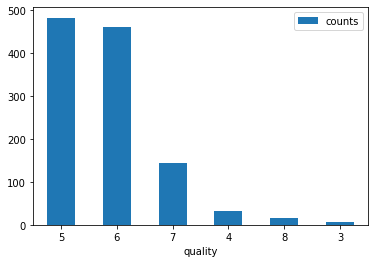

In [198]:
plotDf = wineDf[['quality', 'Id']]
plotDf['counts'] = plotDf['Id'].groupby(plotDf['quality']).transform('count')
plotDf = plotDf.drop(columns=['Id']).drop_duplicates()
plotDf.plot.bar(x='quality', y='counts', rot=0)

We can conclude that the wine in the dataset can be divided into 6 broad categories which will make this problem a multi-class classification problem. We can also see immense bias in the data which will mean we have to upsample the minority groups so that our model doesnot imple,ent the bias in its predictions.  

In [199]:
wineDf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


We also want to see the correlation in the data so we can estimate the diversity of the data and choose a range of models that perform well with said diversity. 

In [200]:
wineDf.corr().style.background_gradient(cmap="Blues")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


The heatmap above shows immense diversity in our data with very little correlation. This means we need a model that does resampling to upsample the minority classes and then use bootstrapped samples to predict the multiple classes as the attributes are too diverse for simple mdoels like KNN. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd55c07fa50>,
      dtype=object)

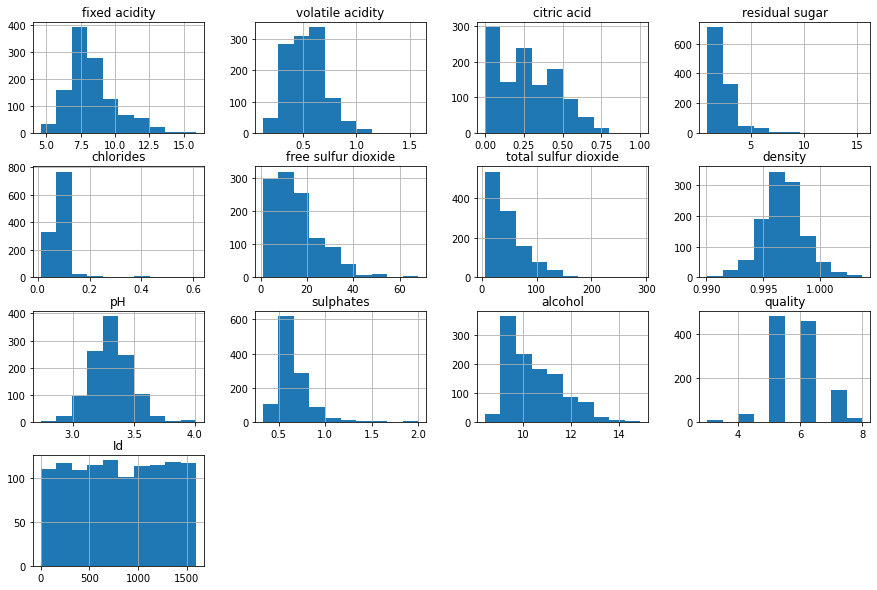

In [201]:
wineDf.hist(figsize = (15,10))

There are multple columns like the fixed acidity, alcohol content, adn pH levels that have vastly diverse data. This can cripple a simple model that will perform poorly on fixed data. At a first glance, the Random Forests might be the best solution for handling diverse numerical data and giving decent accuracy by resampling the features and labels. 

In [202]:
y=wineDf[['quality']]
X=wineDf.drop(columns = ['quality'])

As mentioend and observed above, the minority classes like levels 3 adn 4 need to be upsampled so as to reach the scale of the other qualities of the wines mentioned. We use a simple minority upsampling technique to handle this imbalanced Classification. 

In [203]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

For splitting the data, the norm is to use a 60:40 split, however since our data is too diverse, there may be instances that the model hasnt encountered that can cause a lower accuracy. We thus use a 75:25 split to allow our model enough diverse data so it can familiarise itself to the features.

In [214]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2110)

In [215]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


Random Forests, Decision Trees and Boosting algorithms perform best with diverse data, so we can run a simple comparison to check which model gives the best accuracy for this dataset. 

In [216]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 2110)
classifier.fit(X_train,y_train.values.ravel())
y_pred=classifier.predict(X_test)
print('DT accuracy: ', str(accuracy_score(y_pred,y_test)*100))

DT accuracy:  80.27586206896552


In [217]:
classifier=RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 2110)
classifier.fit(X_train,y_train.values.ravel())
y_pred=classifier.predict(X_test)
print('RF accuracy: ', str(accuracy_score(y_pred,y_test)*100))

RF accuracy:  86.06896551724138


In [218]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train,y_train.values.ravel())
y_pred=classifier.predict(X_test)

print('XGB accuracy: ', str(accuracy_score(y_pred,y_test)*100))

XGB accuracy:  78.62068965517241


We can thus conclude that the Random Forests mdoel performs best for this dataset and handles the diversity of the data. A research was also conducted by me where the upsampling was not included in preprocessing the data, and the accuracies for all models was significanlty poor (~60-65%). Hence the solution to include upsampling was included. A scaling solution (StandardScaler) was also implemented however it made no difference to the model's performance, which is why it was removed.  